<a href="https://colab.research.google.com/github/YaniLozanov/Educational-projects/blob/master/Time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting with TensorFlow: BitPredict

## Get data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2021-11-09 19:04:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2021-11-09 19:04:42 (17.1 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time series with pandas

In [ ]:
# Import with pandas
import pandas as pd

df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
# How many samples do we have
len(df)

2787

In [ ]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


Text(0, 0.5, 'BTC Price')

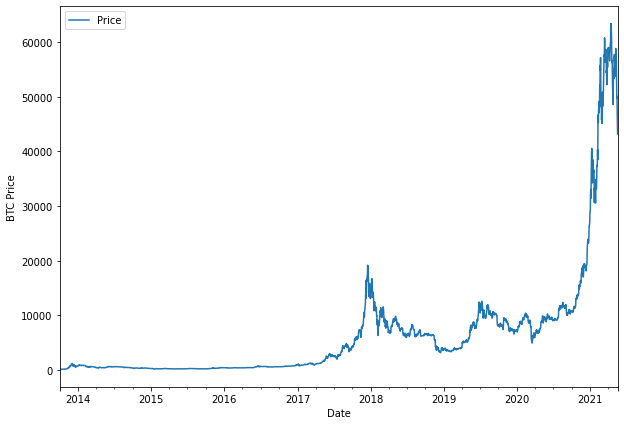

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")

## Importing time series data with Python's CSV module

In [ ]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader) # skip first line (header)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates not string
    btc_price.append(float(line[2]))

# View first 10 each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

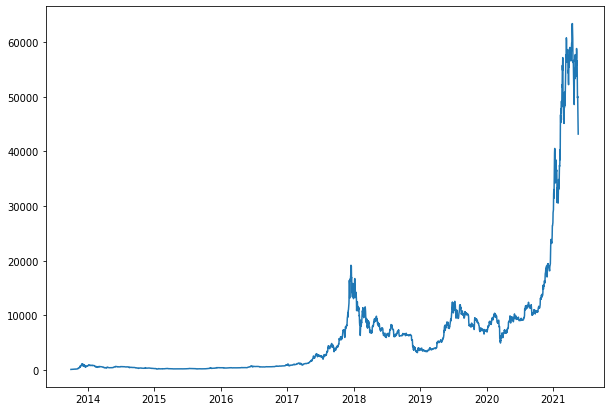

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)

## Format data part 1: Create train and test sets of our time series data

### Create train and test sets with time series data (the wrong way)

In [ ]:
# Get bticoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [ ]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42) # To make it right way just set shuffle=False

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

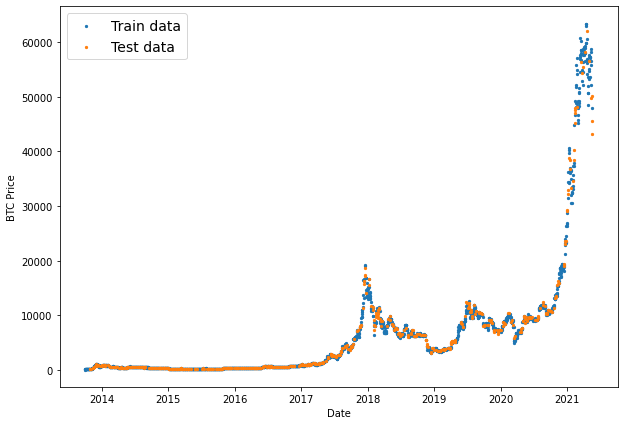

In [ ]:
# Let's okit wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

### Create train and test sets for time series (the right way)

In [ ]:
# Create train and test splits the right way
split_size = int(0.8 * len(prices))

# Create train data splits 
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits
X_test, y_test = timesteps[split_size:], prices[split_size:]


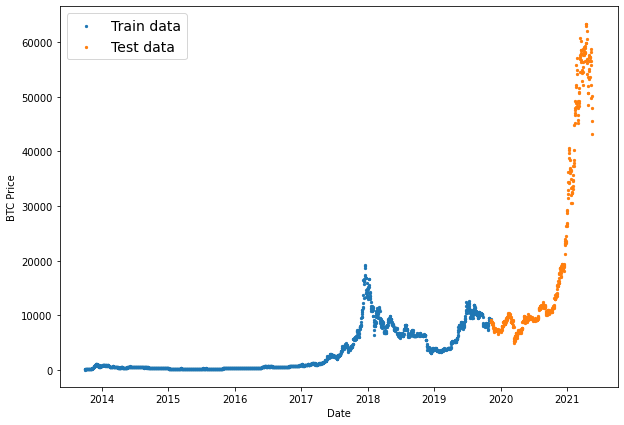

In [ ]:
# Plot correct splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

## Create a ploting function 


In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

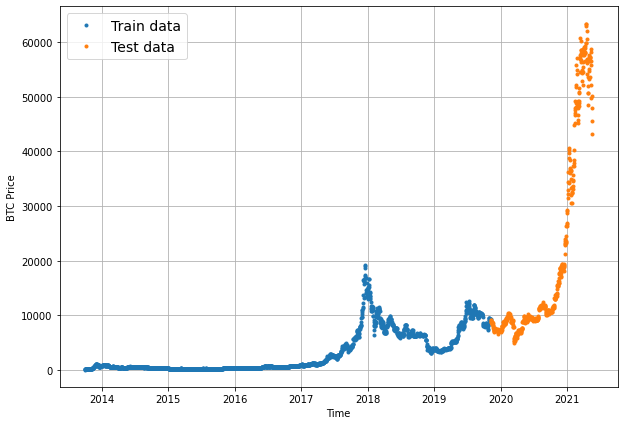

In [ ]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, label="Train data")
plot_time_series(X_test, y_test, label="Test data")


## Modelling Experiments

 ## Model 0: Naive forecast (baseline)

In [ ]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

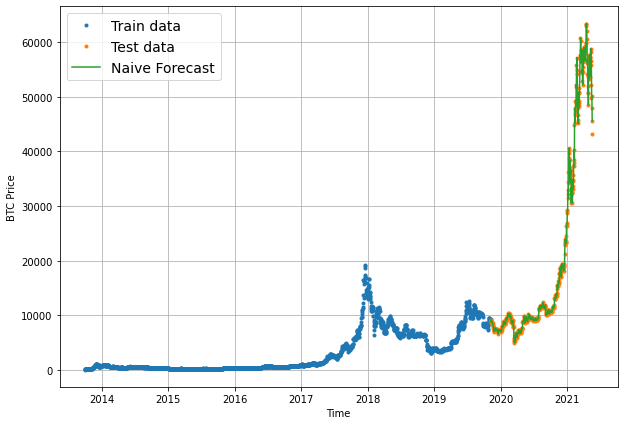

In [ ]:
# PLot naive forcast 
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, label="Train data")
plot_time_series(X_test, y_test, label="Test data")
plot_time_series(X_test[1:], naive_forecast, format="-", label="Naive Forecast")

## Evaluating a time series model


In [ ]:
import tensorflow as tf


In [ ]:
# MASE metric Implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forcast
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae / mae_naive_no_season

In [ ]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
# Create a function to take in model predictions and truth values
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate varius evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)


  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mase)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_test[1:],
                               naive_forecast)
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

## Format Data Part 2: Windowing our dataset


In [ ]:
# Let;s setup global variable for window and horizon size
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create function to label windowed data
def get_labeled_windows(x, horizon=HORIZON):
  """
  Create labels for windowed dataset.
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labeled_windows(tf.expand_dims(tf.range(8), axis=0))
test_window, test_label 

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [ ]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  
  # 1. Create a window of specific window_size (2d) [[0, 1, 2, 3, 4...]]
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  
  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T
  
  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labeled_windows(windowed_array, horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)

len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


## Turning windows into training and test sets

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits
  """
  splits_size = int(len(windows) * (1-test_split)) 

  train_windows = windows[:splits_size]
  train_labels = labels[:splits_size]

  test_windows = windows[splits_size:]
  test_labels = labels[splits_size:]

  return train_windows, test_windows, train_labels, test_labels 

In [ ]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
test_windows[:5], test_labels[:5]

(array([[9290.89660239, 9202.41545055, 9369.62808116, 9326.59962378,
         9335.75240233, 9226.48582088, 8794.35864452],
        [9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
         9226.48582088, 8794.35864452, 8798.04205463],
        [9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
         8794.35864452, 8798.04205463, 9081.18687849],
        [9326.59962378, 9335.75240233, 9226.48582088, 8794.35864452,
         8798.04205463, 9081.18687849, 8711.53433917],
        [9335.75240233, 9226.48582088, 8794.35864452, 8798.04205463,
         9081.18687849, 8711.53433917, 8760.89271814]]),
 array([[8798.04205463],
        [9081.18687849],
        [8711.53433917],
        [8760.89271814],
        [8749.52059102]]))

## Make a modelling checkpoint

In [ ]:
import os 

# Create a function to implement a ModelCheckpoint callback with a specifi filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            verbose=0,
                                            save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear")
], name="model_1_dense")

In [ ]:
# 2. Compile the model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

In [ ]:
# 3. Fit the model
model_1.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 4s 68ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6526 - val_mae: 2279.6526 - val_mse: 12772728.0000
Epoch 2/100
18/18 [==============================] - 1s 41ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9991 - val_mae: 1005.9991 - val_mse: 3441833.5000
Epoch 3/100
18/18 [==============================] - 1s 40ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5625 - val_loss: 923.2862 - val_mae: 923.2862 - val_mse: 2868220.5000
Epoch 4/100
18/18 [==============================] - 1s 41ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.2500
Epoch 5/100
18/18 [==============================] - 1s 43ms/step - loss: 165.0895 - mae: 165.0895 - mse: 145490.7969 - val_loss: 895.2238 - val_mae: 895.2238 - val_mse: 2564574.0000
Epoch 6/100
18/18 [==============================] - 1s 40ms/step - loss: 158.5

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.9762 - mae: 585.9762 - mse: 1197803.1250


[585.9761962890625, 585.9761962890625, 1197803.125]

In [ ]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.9512 - mae: 568.9512 - mse: 1171744.0000


[568.951171875, 568.951171875, 1171744.0]

## Making forecasts with a model


In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)


In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_1_preds)
model_1_results

{'mae': 568.95123,
 'mape': 2.5448983,
 'mase': 0.9994897,
 'mse': 1171744.0,
 'rmse': 1082.4713}

In [ ]:
naive_results

{'mae': 567.9802,
 'mape': 2.516525,
 'mase': 0.99957,
 'mse': 1147547.0,
 'rmse': 1071.2362}

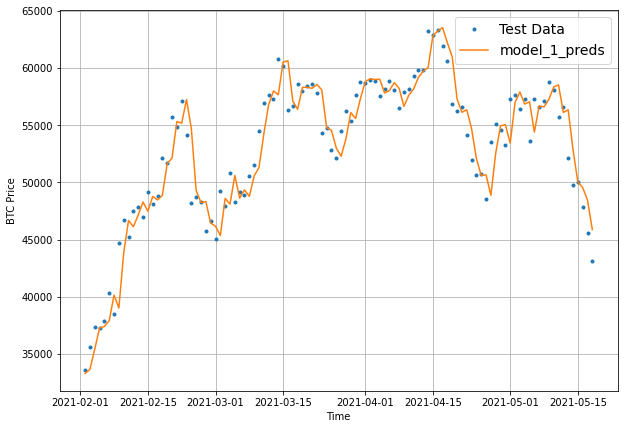

In [ ]:
# Let's plot out model 1 predictions
offset = 450
plt.figure(figsize=(10, 7))
plot_time_series(X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test Data")

plot_time_series(X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)

In [ ]:
WINDOW_SIZE = 30 

In [ ]:
# Window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows,
                                                                                full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
train_windows[:3], train_labels[:3]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
         126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
         152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
         180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  , 124.049  , 125.96116, 125.27966, 125.9275 , 126.38333,
         135.24199, 133.20333, 142.76333, 137.92333, 142.95166, 152.55183,
         160.33883, 164.31499, 177.63333, 188.29716, 200.70166, 180.355  ,
         175.03166, 177.6965 , 187.15983, 192.75666, 197.4    , 196.02499],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  , 125.96116, 125.27966, 125.9275 , 126.38333, 135.24199,
         133.20333, 142.76333, 137.92333, 142.95166, 152.55183, 160.33883,
         164.31499, 177

In [ ]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_2_dense")

In [ ]:
# Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
# Fit 
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_2.name)])

INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_2_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9615


608.9614868164062

In [ ]:
# Load in the best performin model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9615


608.9614868164062

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           test_windows)

In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_2_preds)
model_2_results

{'mae': 608.9615,
 'mape': 2.7693386,
 'mase': 1.0644706,
 'mse': 1281438.8,
 'rmse': 1132.0065}

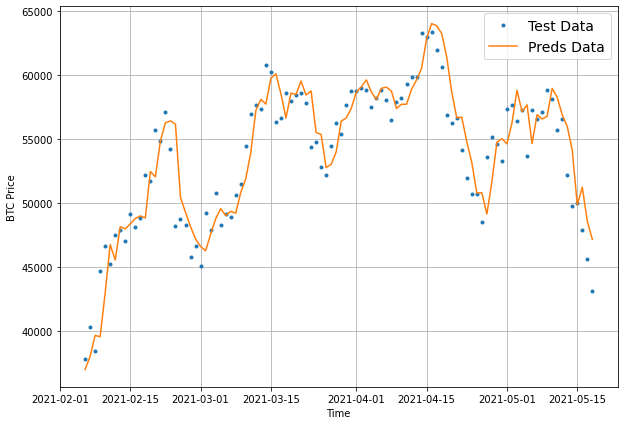

In [ ]:
offset = 450
plt.figure(figsize=(10, 7))
plot_time_series(X_test[-len(test_windows):],
                 test_labels[:, 0],
                 start=offset,
                 label="Test Data")
plot_time_series(X_test[-len(test_windows):],
                 model_2_preds,
                 start=offset,
                 format="-",
                 label="Preds Data")

## Model 3: Dense (window = 30, horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices,
                                         window_size=WINDOW_SIZE, 
                                         horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except different data input and output sizes )
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

In [ ]:
# Compile 
model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
# Fit 
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets
INFO:tensorflow:Assets written to: mod

In [ ]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1321.5201


1321.5201416015625

In [ ]:
# Load best version of model 3
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5063


1237.50634765625

In [ ]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9004.693 , 9048.1   , 9425.088 , 9258.259 , 9495.798 , 9558.451 ,
        9357.354 ],
       [8735.507 , 8840.304 , 9247.793 , 8885.6   , 9097.188 , 9174.329 ,
        9156.819 ],
       [8672.508 , 8782.388 , 9123.855 , 8770.371 , 9007.13  , 9003.87  ,
        9042.724 ],
       [8874.398 , 8784.737 , 9043.901 , 8943.051 , 9033.478 , 9176.488 ,
        9039.676 ],
       [8825.891 , 8777.4375, 8926.779 , 8870.178 , 9213.232 , 9268.156 ,
        8942.485 ]], dtype=float32)>

In [ ]:
# Evaluate model_3 results
model_3_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_3_preds)
model_3_results

{'mae': 1237.5063,
 'mape': 2.2020736,
 'mase': 2.2020736,
 'mse': 5405198.5,
 'rmse': 1425.7479}

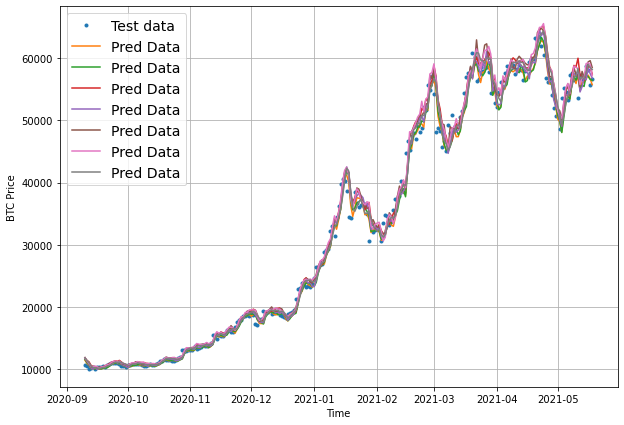

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test data")
plot_time_series(X_test[-len(test_windows):],
                 values=model_3_preds,
                 start=offset,
                 format="-",
                 label="Pred Data")

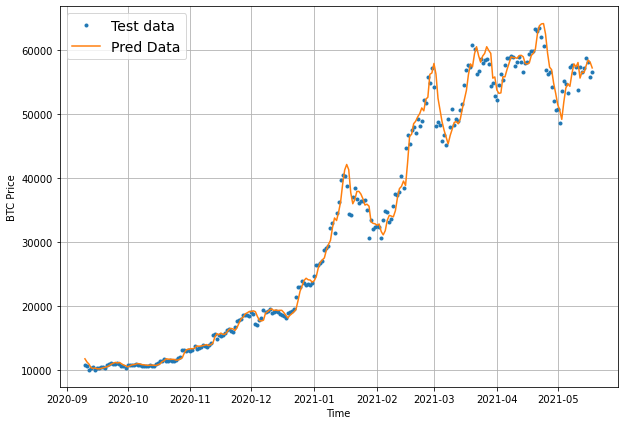

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test data")
plot_time_series(X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 format="-",
                 label="Pred Data")

## Which of our models is performing the best so far


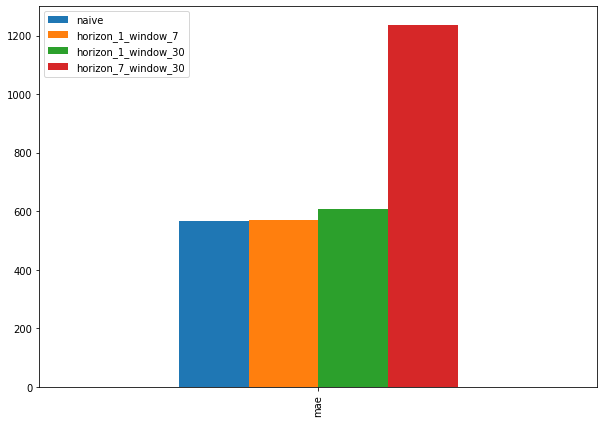

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]},
             index={"mae"}).plot(figsize=(10, 7), kind="bar")

## Model 4: Conv1D

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create winodowd data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

In [ ]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
# Check the inpus shape
train_windows[0].shape

(7,)

In [ ]:
# Before we pass out data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [ ]:
# Test out our labda layer
print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")

Original shape: (7,)
Expanded shape: (7, 1)


In [ ]:
tf.random.set_seed(42)

# Create Conv1D
model_4 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(128, kernel_size=5, strides=1, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

In [ ]:
# Compile the model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
# Fit the model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_4.name)])

INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_conv1D/assets
INFO:tensorflow:Assets wr

In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate model...
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 610.1541


610.1541137695312

In [ ]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 570.8285


570.8284912109375

In [ ]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8851.464, 8754.471, 8983.927, 8759.672, 8703.628, 8708.294,
       8661.667, 8494.84 , 8435.316, 8492.114], dtype=float32)>

In [ ]:
# Evaluate predictions
model_4_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_4_preds)
model_4_results

{'mae': 570.8284,
 'mape': 2.559336,
 'mase': 1.0027875,
 'mse': 1176671.6,
 'rmse': 1084.745}

## Model 5: RNN (LSTM)

In [ ]:
# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=WINDOW_SIZE)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(128, activation="relu")(x)
#x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_LSTM")


In [ ]:
# Compile the model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())


In [ ]:
# Fit the model
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_5.name)])

Epoch 1/100
15/18 [========================>.....] - ETA: 0s - loss: 2399.0493INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 4s 160ms/step - loss: 2335.2922 - val_loss: 9880.2461
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 822.2474 INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 157ms/step - loss: 807.0569 - val_loss: 1118.6293
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 253.9110 - val_loss: 1281.7898
Epoch 4/100
14/18 [======================>.......] - ETA: 0s - loss: 209.6106INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 145ms/step - loss: 203.8625 - val_loss: 1079.5022
Epoch 5/100
16/18 [=========================>....] - ETA: 0s - loss: 194.3185INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 142ms/step - loss: 191.2978 - val_loss: 1068.3984
Epoch 6/100
17/18 [===========================>..] - ETA: 0s - loss: 189.7076INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 141ms/step - loss: 191.5461 - val_loss: 1056.6630
Epoch 7/100
18/18 [==============================] - 0s 10ms/step - loss: 187.4206 - val_loss: 1066.2435
Epoch 8/100
18/18 [==============================] - 0s 9ms/step - loss: 184.6467 - val_loss: 1061.5988
Epoch 9/100
16/18 [=========================>....] - ETA: 0s - loss: 185.9845INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 164ms/step - loss: 182.6696 - val_loss: 1048.7314
Epoch 10/100
16/18 [=========================>....] - ETA: 0s - loss: 178.3730INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 140ms/step - loss: 181.6111 - val_loss: 1029.8967
Epoch 11/100
17/18 [===========================>..] - ETA: 0s - loss: 181.4111INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 140ms/step - loss: 181.1786 - val_loss: 1029.7880
Epoch 12/100
13/18 [====================>.........] - ETA: 0s - loss: 181.4642INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 164ms/step - loss: 179.8507 - val_loss: 1015.4171
Epoch 13/100
14/18 [======================>.......] - ETA: 0s - loss: 176.7840INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 145ms/step - loss: 177.4958 - val_loss: 1003.1680
Epoch 14/100
18/18 [==============================] - 0s 9ms/step - loss: 175.8761 - val_loss: 1024.5377
Epoch 15/100
18/18 [==============================] - 0s 9ms/step - loss: 175.3560 - val_loss: 1008.2181
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 170.7968INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 140ms/step - loss: 173.2440 - val_loss: 966.6474
Epoch 17/100
18/18 [==============================] - 0s 10ms/step - loss: 171.8057 - val_loss: 1028.2844
Epoch 18/100
18/18 [==============================] - 0s 9ms/step - loss: 170.7999 - val_loss: 1023.2718
Epoch 19/100
18/18 [==============================] - 0s 9ms/step - loss: 169.2529 - val_loss: 1023.2585
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 168.2241INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 137ms/step - loss: 168.7919 - val_loss: 942.4572
Epoch 21/100
16/18 [=========================>....] - ETA: 0s - loss: 163.9778INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 160ms/step - loss: 165.1443 - val_loss: 935.9726
Epoch 22/100
16/18 [=========================>....] - ETA: 0s - loss: 166.3851INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 140ms/step - loss: 163.5979 - val_loss: 935.0870
Epoch 23/100
18/18 [==============================] - 0s 10ms/step - loss: 162.8252 - val_loss: 948.4776
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 161.7510INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 142ms/step - loss: 160.1139 - val_loss: 926.3398
Epoch 25/100
16/18 [=========================>....] - ETA: 0s - loss: 162.4887INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 147ms/step - loss: 158.8025 - val_loss: 892.9959
Epoch 26/100
16/18 [=========================>....] - ETA: 0s - loss: 157.9169INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 166ms/step - loss: 156.7181 - val_loss: 891.3825
Epoch 27/100
18/18 [==============================] - 0s 9ms/step - loss: 155.5458 - val_loss: 895.8940
Epoch 28/100
16/18 [=========================>....] - ETA: 0s - loss: 153.9022INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 140ms/step - loss: 154.9997 - val_loss: 856.6907
Epoch 29/100
18/18 [==============================] - 0s 9ms/step - loss: 152.5825 - val_loss: 867.5728
Epoch 30/100
18/18 [==============================] - 0s 10ms/step - loss: 151.7614 - val_loss: 865.5043
Epoch 31/100
17/18 [===========================>..] - ETA: 0s - loss: 149.3168INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 141ms/step - loss: 149.2200 - val_loss: 836.3127
Epoch 32/100
18/18 [==============================] - 0s 9ms/step - loss: 148.3450 - val_loss: 842.1814
Epoch 33/100
18/18 [==============================] - 0s 9ms/step - loss: 146.6770 - val_loss: 869.1693
Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 145.1382INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 165ms/step - loss: 146.0502 - val_loss: 801.7166
Epoch 35/100
18/18 [==============================] - 0s 9ms/step - loss: 143.3618 - val_loss: 820.6849
Epoch 36/100
16/18 [=========================>....] - ETA: 0s - loss: 143.0408INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 142ms/step - loss: 144.0306 - val_loss: 790.3140
Epoch 37/100
18/18 [==============================] - 0s 9ms/step - loss: 142.4782 - val_loss: 824.2919
Epoch 38/100
18/18 [==============================] - ETA: 0s - loss: 141.0481INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 141ms/step - loss: 141.0481 - val_loss: 771.2405
Epoch 39/100
16/18 [=========================>....] - ETA: 0s - loss: 140.2709INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 140ms/step - loss: 139.1632 - val_loss: 765.6123
Epoch 40/100
18/18 [==============================] - 0s 9ms/step - loss: 138.6900 - val_loss: 770.7375
Epoch 41/100
15/18 [========================>.....] - ETA: 0s - loss: 141.2114INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 166ms/step - loss: 135.9635 - val_loss: 754.3399
Epoch 42/100
16/18 [=========================>....] - ETA: 0s - loss: 134.9899INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 142ms/step - loss: 134.9260 - val_loss: 753.1099
Epoch 43/100
18/18 [==============================] - 0s 9ms/step - loss: 134.1012 - val_loss: 753.1195
Epoch 44/100
17/18 [===========================>..] - ETA: 0s - loss: 133.3844INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 145ms/step - loss: 132.1862 - val_loss: 733.4193
Epoch 45/100
16/18 [=========================>....] - ETA: 0s - loss: 128.8525INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 161ms/step - loss: 131.1954 - val_loss: 727.6318
Epoch 46/100
18/18 [==============================] - 0s 10ms/step - loss: 131.6667 - val_loss: 750.4437
Epoch 47/100
14/18 [======================>.......] - ETA: 0s - loss: 121.8397INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 146ms/step - loss: 130.8692 - val_loss: 720.7432
Epoch 48/100
18/18 [==============================] - 0s 9ms/step - loss: 129.3128 - val_loss: 735.0422
Epoch 49/100
16/18 [=========================>....] - ETA: 0s - loss: 127.4669INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 145ms/step - loss: 128.2611 - val_loss: 715.4223
Epoch 50/100
18/18 [==============================] - 0s 9ms/step - loss: 130.4509 - val_loss: 726.1110
Epoch 51/100
18/18 [==============================] - 0s 9ms/step - loss: 130.7210 - val_loss: 787.7686
Epoch 52/100
16/18 [=========================>....] - ETA: 0s - loss: 138.5991INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 141ms/step - loss: 135.8318 - val_loss: 691.9739
Epoch 53/100
16/18 [=========================>....] - ETA: 0s - loss: 127.8519INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 164ms/step - loss: 127.9167 - val_loss: 688.1035
Epoch 54/100
18/18 [==============================] - 0s 10ms/step - loss: 126.0103 - val_loss: 691.0955
Epoch 55/100
16/18 [=========================>....] - ETA: 0s - loss: 127.3362INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 146ms/step - loss: 124.6295 - val_loss: 687.9539
Epoch 56/100
15/18 [========================>.....] - ETA: 0s - loss: 124.9458INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 144ms/step - loss: 125.4765 - val_loss: 683.5670
Epoch 57/100
18/18 [==============================] - 0s 9ms/step - loss: 124.6456 - val_loss: 688.2227
Epoch 58/100
15/18 [========================>.....] - ETA: 0s - loss: 122.0074INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 164ms/step - loss: 121.7494 - val_loss: 667.3915
Epoch 59/100
14/18 [======================>.......] - ETA: 0s - loss: 120.6949INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 145ms/step - loss: 120.8784 - val_loss: 663.4424
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 121.6620 - val_loss: 669.4904
Epoch 61/100
18/18 [==============================] - 0s 9ms/step - loss: 121.8267 - val_loss: 714.1641
Epoch 62/100
18/18 [==============================] - 0s 10ms/step - loss: 124.5203 - val_loss: 736.5469
Epoch 63/100
15/18 [========================>.....] - ETA: 0s - loss: 126.6438INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 145ms/step - loss: 124.5796 - val_loss: 661.4711
Epoch 64/100
17/18 [===========================>..] - ETA: 0s - loss: 118.3739INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 139ms/step - loss: 118.8248 - val_loss: 657.8318
Epoch 65/100
17/18 [===========================>..] - ETA: 0s - loss: 119.7871INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 172ms/step - loss: 118.5740 - val_loss: 646.9576
Epoch 66/100
18/18 [==============================] - 0s 10ms/step - loss: 118.1062 - val_loss: 661.8781
Epoch 67/100
16/18 [=========================>....] - ETA: 0s - loss: 115.9380INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 142ms/step - loss: 118.8844 - val_loss: 643.1437
Epoch 68/100
16/18 [=========================>....] - ETA: 0s - loss: 119.7711INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 146ms/step - loss: 118.5172 - val_loss: 637.1913
Epoch 69/100
18/18 [==============================] - 0s 10ms/step - loss: 120.7419 - val_loss: 644.5657
Epoch 70/100
17/18 [===========================>..] - ETA: 0s - loss: 116.5051INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 161ms/step - loss: 117.9889 - val_loss: 632.8613
Epoch 71/100
18/18 [==============================] - 0s 9ms/step - loss: 117.2857 - val_loss: 672.7699
Epoch 72/100
18/18 [==============================] - 0s 9ms/step - loss: 119.6962 - val_loss: 651.7178
Epoch 73/100
17/18 [===========================>..] - ETA: 0s - loss: 119.3869INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 144ms/step - loss: 118.2776 - val_loss: 627.9221
Epoch 74/100
18/18 [==============================] - 0s 9ms/step - loss: 116.7710 - val_loss: 644.7606
Epoch 75/100
18/18 [==============================] - 0s 9ms/step - loss: 116.5568 - val_loss: 654.1300
Epoch 76/100
17/18 [===========================>..] - ETA: 0s - loss: 116.0906INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 142ms/step - loss: 116.2069 - val_loss: 621.2501
Epoch 77/100
18/18 [==============================] - 0s 10ms/step - loss: 114.8792 - val_loss: 671.6635
Epoch 78/100
18/18 [==============================] - 0s 9ms/step - loss: 117.3429 - val_loss: 638.2906
Epoch 79/100
17/18 [===========================>..] - ETA: 0s - loss: 115.8071INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 143ms/step - loss: 115.2660 - val_loss: 618.5723
Epoch 80/100
18/18 [==============================] - 0s 9ms/step - loss: 113.8584 - val_loss: 634.3782
Epoch 81/100
18/18 [==============================] - 0s 10ms/step - loss: 114.5261 - val_loss: 646.8967
Epoch 82/100
18/18 [==============================] - 0s 9ms/step - loss: 117.3716 - val_loss: 625.5118
Epoch 83/100
18/18 [==============================] - 0s 10ms/step - loss: 114.1264 - val_loss: 646.2432
Epoch 84/100
18/18 [==============================] - 0s 9ms/step - loss: 115.4843 - val_loss: 623.2954
Epoch 85/100
18/18 [==============================] - 0s 9ms/step - loss: 114.8022 - val_loss: 631.2272
Epoch 86/100
17/18 [===========================>..] - ETA: 0s - loss: 114.8551INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 161ms/step - loss: 116.1460 - val_loss: 617.5832
Epoch 87/100
17/18 [===========================>..] - ETA: 0s - loss: 114.5175INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 144ms/step - loss: 114.0170 - val_loss: 606.1711
Epoch 88/100
18/18 [==============================] - 0s 9ms/step - loss: 112.4861 - val_loss: 613.4077
Epoch 89/100
18/18 [==============================] - 0s 9ms/step - loss: 112.2796 - val_loss: 623.6400
Epoch 90/100
18/18 [==============================] - 0s 9ms/step - loss: 116.7234 - val_loss: 643.6943
Epoch 91/100
18/18 [==============================] - 0s 9ms/step - loss: 115.8138 - val_loss: 654.1453
Epoch 92/100
17/18 [===========================>..] - ETA: 0s - loss: 113.1060INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 2s 143ms/step - loss: 113.0354 - val_loss: 601.2086
Epoch 93/100
18/18 [==============================] - 0s 10ms/step - loss: 113.4937 - val_loss: 601.9614
Epoch 94/100
15/18 [========================>.....] - ETA: 0s - loss: 114.1597INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 162ms/step - loss: 111.4623 - val_loss: 599.5482
Epoch 95/100
14/18 [======================>.......] - ETA: 0s - loss: 113.0299INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_LSTM/assets


18/18 [==============================] - 3s 147ms/step - loss: 111.6213 - val_loss: 598.4158
Epoch 96/100
18/18 [==============================] - 0s 9ms/step - loss: 113.0081 - val_loss: 618.4993
Epoch 97/100
18/18 [==============================] - 0s 10ms/step - loss: 115.2265 - val_loss: 647.1555
Epoch 98/100
18/18 [==============================] - 0s 10ms/step - loss: 113.3771 - val_loss: 601.3848
Epoch 99/100
18/18 [==============================] - 0s 9ms/step - loss: 111.3519 - val_loss: 598.8117
Epoch 100/100
18/18 [==============================] - 0s 9ms/step - loss: 114.7376 - val_loss: 600.8639


In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_LSTM")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 598.4157


598.4157104492188

In [ ]:
# Make prediction with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8965.354, 8835.615, 8975.375, 8772.288, 8748.687], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_5_preds)
model_5_results

{'mae': 598.4158,
 'mape': 2.6813145,
 'mase': 1.0512508,
 'mse': 1271503.9,
 'rmse': 1127.6097}

## Make a miltivariate time series dataset

In [ ]:
# Let's make a miltivariate time series
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Let's add the bitcoin having envents to our dataset
block_reward_1 = 50 # 3 january 2009
block_reward_2 = 25 # 8 November 2012
block_reward_3 = 12.5 # 9 july 2016
block_reward_4 = 6.25 # 18 May 2020

# Block reward dates
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
# Create date ranges of where specific block_reward values should be
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_3_days

2421

In [ ]:
# Add in a block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block_reward balues as a feature to our dataframe
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4


In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.tail()


,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


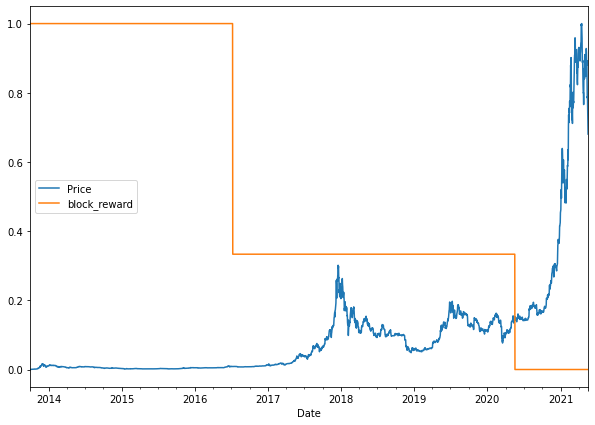

In [ ]:
# Plot the block reward vs price over time
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10, 7))

## Making a windowed dataset with pandas

In [ ]:
# Setup dataset hyperparameters
HORIZON = 1 
WINDOW_SIZE = 7


In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add widowed columns
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
# Create X(windows) and y (horizons) features
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [ ]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
# Make train and test sets using indexing 
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test =X[split_size:], y[split_size:]

len(X_train), len(y_train)

(2224, 2224)

## Model 6: Dense (miltivariate time series)

In [ ]:
# Make miltivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

In [ ]:
# Compile the model
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_6.name)])

Epoch 1/100
 1/18 [>.............................] - ETA: 6s - loss: 3738.5872INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 43ms/step - loss: 1734.6200 - val_loss: 1271.1191
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 359.9636 - val_loss: 1836.7675
Epoch 3/100
 1/18 [>.............................] - ETA: 0s - loss: 244.6909INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 36ms/step - loss: 222.5266 - val_loss: 1215.1200
Epoch 4/100
18/18 [==============================] - ETA: 0s - loss: 184.8817INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 36ms/step - loss: 184.8817 - val_loss: 1058.5168
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 178.1187INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 54ms/step - loss: 178.1187 - val_loss: 995.0116
Epoch 6/100
15/18 [========================>.....] - ETA: 0s - loss: 174.3761INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 36ms/step - loss: 174.5969 - val_loss: 990.8204
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 222.1624INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 36ms/step - loss: 166.2851 - val_loss: 924.9037
Epoch 8/100
 1/18 [>.............................] - ETA: 0s - loss: 139.5456INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 35ms/step - loss: 160.0860 - val_loss: 874.6092
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 156.0363 - val_loss: 895.1463
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 166.9717INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 34ms/step - loss: 149.8575 - val_loss: 809.0403
Epoch 11/100
16/18 [=========================>....] - ETA: 0s - loss: 142.6819INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 144.2509 - val_loss: 783.1421
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 140.2141 - val_loss: 795.4517
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 139.6102 - val_loss: 829.2001
Epoch 14/100
17/18 [===========================>..] - ETA: 0s - loss: 130.6597INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 133.4620 - val_loss: 759.6295
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 128.5325INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 36ms/step - loss: 131.3798 - val_loss: 716.6685
Epoch 16/100
15/18 [========================>.....] - ETA: 0s - loss: 126.0789INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 36ms/step - loss: 126.7536 - val_loss: 713.4036
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 124.6217 - val_loss: 736.6628
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 140.0102INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 123.9039 - val_loss: 667.0847
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 122.0822 - val_loss: 692.0282
Epoch 20/100
18/18 [==============================] - 0s 5ms/step - loss: 120.4695 - val_loss: 695.7029
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 160.4358INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 36ms/step - loss: 124.2597 - val_loss: 655.9279
Epoch 22/100
18/18 [==============================] - ETA: 0s - loss: 117.4042INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 35ms/step - loss: 117.4042 - val_loss: 634.9478
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 116.6170INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 116.6170 - val_loss: 631.4716
Epoch 24/100
18/18 [==============================] - ETA: 0s - loss: 117.4323INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 35ms/step - loss: 117.4323 - val_loss: 620.4847
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 123.7460INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 35ms/step - loss: 114.6757 - val_loss: 614.6613
Epoch 26/100
 1/18 [>.............................] - ETA: 0s - loss: 112.5653INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 36ms/step - loss: 115.1176 - val_loss: 609.2394
Epoch 27/100
16/18 [=========================>....] - ETA: 0s - loss: 117.7512INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 116.4259 - val_loss: 605.4542
Epoch 28/100
18/18 [==============================] - ETA: 0s - loss: 112.2903INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 36ms/step - loss: 112.2903 - val_loss: 603.1577
Epoch 29/100
17/18 [===========================>..] - ETA: 0s - loss: 110.5839INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 36ms/step - loss: 112.9534 - val_loss: 601.5359
Epoch 30/100
15/18 [========================>.....] - ETA: 0s - loss: 117.1806INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 116.3052 - val_loss: 596.2538
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7679 - val_loss: 599.7740
Epoch 32/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2672 - val_loss: 601.6633
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2901 - val_loss: 628.2498
Epoch 34/100
15/18 [========================>.....] - ETA: 0s - loss: 111.2608INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 111.4587 - val_loss: 590.5644
Epoch 35/100
18/18 [==============================] - 0s 5ms/step - loss: 109.5345 - val_loss: 591.1542
Epoch 36/100
18/18 [==============================] - ETA: 0s - loss: 113.1514INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 113.1514 - val_loss: 581.9723
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 110.3977 - val_loss: 595.5006
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 112.0858 - val_loss: 589.7444
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 109.1908 - val_loss: 584.3672
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 108.8785 - val_loss: 587.2944
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 108.8038 - val_loss: 592.3024
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 112.7041 - val_loss: 644.4152
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 113.2251 - val_loss: 654.3560
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8588 - val_loss: 595.6160
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 10

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 112.5734 - val_loss: 573.9453
Epoch 50/100
18/18 [==============================] - 0s 4ms/step - loss: 110.8326 - val_loss: 678.5391
Epoch 51/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1839 - val_loss: 593.7262
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3130 - val_loss: 626.2597
Epoch 53/100
18/18 [==============================] - 0s 6ms/step - loss: 109.2094 - val_loss: 684.7061
Epoch 54/100
16/18 [=========================>....] - ETA: 0s - loss: 113.9704INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 56ms/step - loss: 113.5986 - val_loss: 569.2675
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 112.1975 - val_loss: 575.2070
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 109.4700 - val_loss: 819.8484
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 130.7634 - val_loss: 744.8096
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 116.2583 - val_loss: 570.8125
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 108.0891 - val_loss: 602.3456
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 107.6660 - val_loss: 596.9283
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 108.3343 - val_loss: 571.1216
Epoch 62/100
18/18 [==============================] - ETA: 0s - loss: 105.6011INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 105.6011 - val_loss: 569.1286
Epoch 63/100
18/18 [==============================] - 0s 6ms/step - loss: 107.6157 - val_loss: 589.5788
Epoch 64/100
18/18 [==============================] - 0s 6ms/step - loss: 107.1272 - val_loss: 576.3801
Epoch 65/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4543 - val_loss: 585.1937
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 107.0291 - val_loss: 588.5547
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 107.1166 - val_loss: 658.3491
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4314 - val_loss: 634.6624
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 118.0706 - val_loss: 610.2491
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 124.4199 - val_loss: 607.6500
Epoch 71/100
18/18 [==============================] - 0s 6ms/step - loss: 11

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 36ms/step - loss: 107.9786 - val_loss: 568.4745
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2482 - val_loss: 575.0289
Epoch 75/100
18/18 [==============================] - 0s 6ms/step - loss: 106.7788 - val_loss: 573.4979
Epoch 76/100
18/18 [==============================] - 0s 6ms/step - loss: 107.7062 - val_loss: 573.6649
Epoch 77/100
18/18 [==============================] - 0s 6ms/step - loss: 106.0542 - val_loss: 568.6586
Epoch 78/100
18/18 [==============================] - 0s 5ms/step - loss: 107.3416 - val_loss: 584.2707
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6261 - val_loss: 578.4714
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 108.4739 - val_loss: 587.1695
Epoch 81/100
17/18 [===========================>..] - ETA: 0s - loss: 105.6454INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 35ms/step - loss: 106.0018 - val_loss: 567.8691
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 115.1418 - val_loss: 568.3765
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 112.5283 - val_loss: 677.6049
Epoch 84/100
18/18 [==============================] - 0s 6ms/step - loss: 113.3616 - val_loss: 599.1793
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9533 - val_loss: 570.9308
Epoch 86/100
18/18 [==============================] - 0s 6ms/step - loss: 105.8637 - val_loss: 581.2766
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 105.2887 - val_loss: 616.6028
Epoch 88/100
18/18 [==============================] - 0s 4ms/step - loss: 108.7117 - val_loss: 569.5594
Epoch 89/100
18/18 [==============================] - ETA: 0s - loss: 105.6495INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 37ms/step - loss: 105.6495 - val_loss: 567.0885
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 104.7914 - val_loss: 570.6016
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 109.3826 - val_loss: 574.3117
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 108.1255 - val_loss: 626.9373
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 119.6403 - val_loss: 664.8304
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 113.3821 - val_loss: 602.9725
Epoch 95/100
13/18 [====================>.........] - ETA: 0s - loss: 105.6286INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


18/18 [==============================] - 1s 38ms/step - loss: 106.1157 - val_loss: 566.2842
Epoch 96/100
18/18 [==============================] - 0s 5ms/step - loss: 113.4442 - val_loss: 729.9344
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 112.2812 - val_loss: 597.8212
Epoch 98/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3021 - val_loss: 583.8563
Epoch 99/100
18/18 [==============================] - 0s 4ms/step - loss: 108.9846 - val_loss: 571.6616
Epoch 100/100
18/18 [==============================] - 0s 6ms/step - loss: 108.2259 - val_loss: 606.1730


In [ ]:
# Evaluate multivariate model
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 606.1730


606.1729736328125

In [ ]:
# Load in and evaluate best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 566.2842


566.2841796875

In [ ]:
# Make predictions with multivariate model
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8830.96 , 8752.166, 9019.749, 8770.649, 8721.503, 8715.381,
       8670.688, 8513.89 , 8432.941, 8516.847], dtype=float32)>

In [ ]:
# Evaluate predictions to get eval metrics
model_6_results = evaluate_preds(y_test,
                                 model_6_preds)
model_6_results

{'mae': 566.2842,
 'mape': 2.5420039,
 'mase': 0.99480444,
 'mse': 1163734.4,
 'rmse': 1078.7653}

## Model 7: N-BEATS algorithm


### Building and testing the N-BEAST block layer

In [ ]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

### Let' s test our NBeatsBlock class

In [ ]:
tf.random.set_seed(42)
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(WINDOW_SIZE,
                                       (WINDOW_SIZE + HORIZON),
                                       HORIZON, 
                                       128,
                                       4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # Input shape to the model has to reflect dense layer input requrements
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)

# These are the activation outputs of the theta layer (they ll be random due to no training the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")



Backcast: [ 0.07960155  0.32512054 -0.84286827 -0.69389844 -0.31720546 -0.5698734
 -0.6396661 ]
Forecast: 1.0071649551391602


## Preparing data for the N-BEATS algorithm using `tf.data`

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Create NBEATS data inputs
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
# Add widnowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)

bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)


# Combine labels and features by zipping together
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset


(<PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, 7), (None,)), types: (tf.float64, tf.float64)>)

### Setting up huperparameters for N-BEATS algorithm

In [ ]:
# Values from N-BEATS paper
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connection

In [ ]:
# Make tensors 
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

added

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28], dtype=int32)>

### Building, compiling and fitting the N-BEATS algorithm

In [ ]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatasBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

CPU times: user 5.39 ms, sys: 0 ns, total: 5.39 ms
Wall time: 5.26 ms


In [ ]:
# 2. Create Input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

In [ ]:
# 3. Create initial backcast and forecast input (backwards predictions + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

In [ ]:
# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # First stack is already created in 3.

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast])


In [ ]:
# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_NBEATS")

In [ ]:
# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

In [ ]:
# 9. Fit model with EarlyStopping and ReduceLROnPlateau callback
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 00618: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00999: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 01099: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.


In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 45ms/step - loss: 575.9880


575.988037109375

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8844.278 , 8787.808 , 9029.275 , 8757.99  , 8767.218 , 8748.2295,
       8661.149 , 8505.082 , 8482.534 , 8514.667 ], dtype=float32)>

In [ ]:
# Evaluate N-BEATAS model preds
model_7_results = evaluate_preds(y_test,
                                 model_7_preds)
model_7_results

{'mae': 575.98804,
 'mape': 2.657787,
 'mase': 1.0118514,
 'mse': 1175103.4,
 'rmse': 1084.0219}

### Plotting the N-BEATS architecture we've created

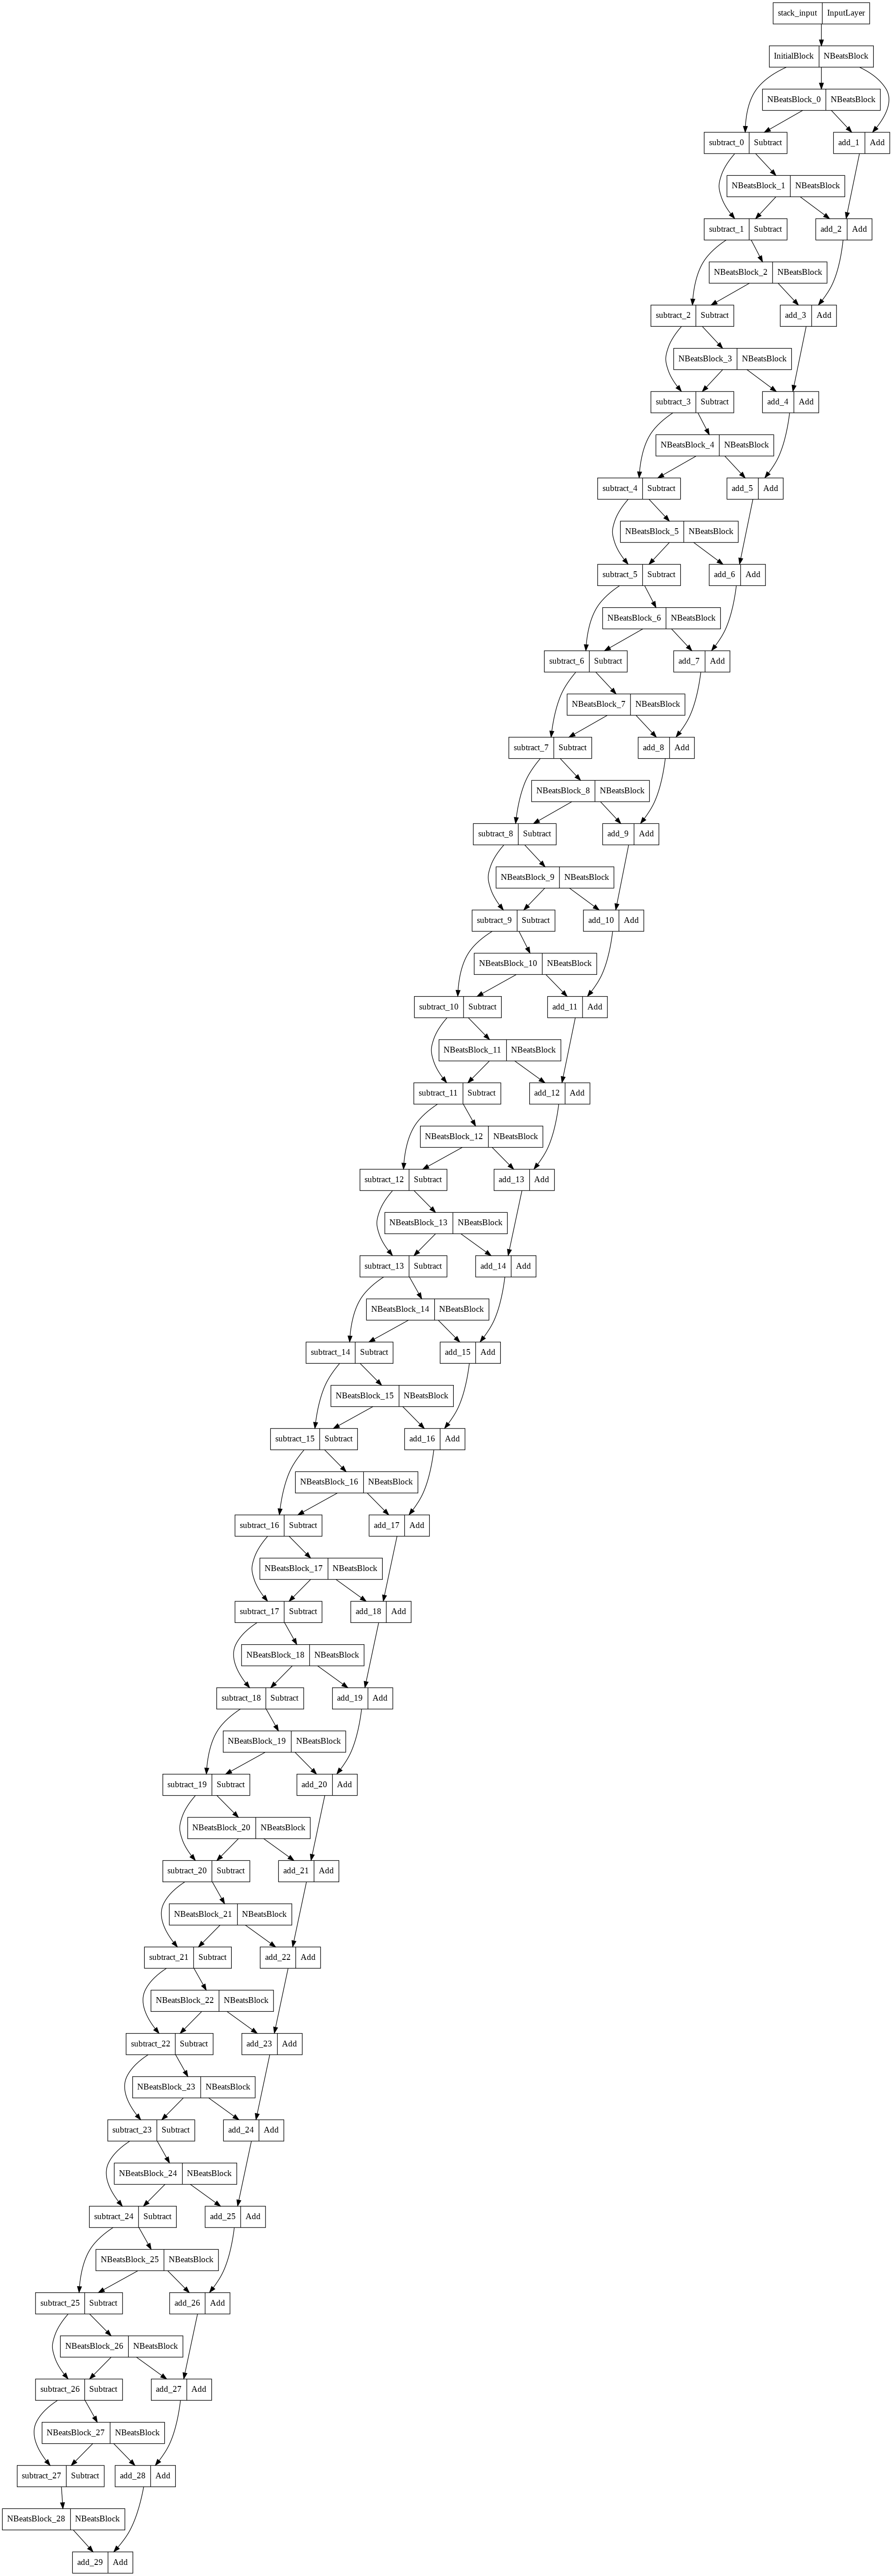

In [ ]:
# Plot the N-BEATS model and inspect the atchitecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

## Model 8: Creating an ensemble

### Constructing and fitting and ensemble of models

In [ ]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=1000,
                        loss_fns=["mae", "mse", "mape"]):
  
  # Make empty list for trained ensemble models
  ensemble_models = []
  
  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimazing model by reducin: {loss_function} forn num_epoch, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Inititalize dense layers with normal distribution  for estimating prediction intervals later on
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit the current model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models

In [ ]:
 %%time
 # Get list of trainde ensemble models
 ensemble_models = get_ensemble_models(num_iter=5,
                                       num_epochs=1000)


Optimazing model by reducin: mae forn num_epoch, model number: 0

Epoch 00994: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimazing model by reducin: mse forn num_epoch, model number: 0

Epoch 00487: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00587: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimazing model by reducin: mape forn num_epoch, model number: 0

Epoch 00165: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00282: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00382: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimazing model by reducin: mae forn num_epoch, model number: 1
Optimazing model by reducin: mse forn num_epoch, model number: 1

Epoch 00409: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00509: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimazing model b

In [ ]:
len(ensemble_models)

15

### Make predictions with our ensemble model

In [ ]:
# Create a function which uses a list of trainde models to make and reutrn a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data)
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
%%time
ensemble_preds = make_ensemble_preds(ensemble_models,
                                     test_dataset)
ensemble_preds

CPU times: user 732 ms, sys: 46.9 ms, total: 779 ms
Wall time: 746 ms


In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds, axis=0)

In [ ]:
ensemble_median = np.median(ensemble_preds, axis=0)

In [ ]:
# Evaluate ensemble model predictions (mean)
ensemble_results = evaluate_preds(y_test,
                                  ensemble_mean)
ensemble_results

{'mae': 567.00684,
 'mape': 2.5803254,
 'mase': 0.99607396,
 'mse': 1143674.8,
 'rmse': 1069.4274}

In [ ]:
# Evaluate ensemble model predictions (median)
ensemble_results = evaluate_preds(y_test,
                                  ensemble_median)
ensemble_results

{'mae': 566.7626,
 'mape': 2.584539,
 'mase': 0.99564487,
 'mse': 1142481.5,
 'rmse': 1068.8693}

### Plotting the predictions intervals (uncertainty estimates) of our ensemble

In [ ]:
 # Find upper and lower bounds of ensemble predictions
 def get_upper_lower(preds):

   # 1. Messure the standard deviation of predictions
   std = tf.math.reduce_std(preds, axis=0)

   # 2. Multiply the standard deviation by 1.96
   interval = 1.96 * std

   # 3. Get predictions interval upper and lower bounds
   preds_mean = tf.reduce_mean(preds, axis=0)
   lower, upper = preds_mean - interval, preds_mean + interval

   return lower, upper

In [ ]:
# Get the upper and lower bounds of the 95% prediction interval
lower, upper = get_upper_lower(ensemble_preds)

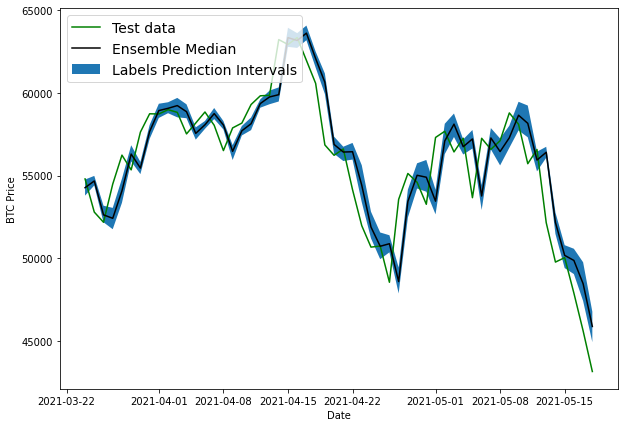

In [ ]:
# Get the mean/median of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals where the preidctions fall ino
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Labels Prediction Intervals")
plt.legend(loc="upper left", fontsize=14)

## Model 9: Train model on the full historical data to make predictions into the feature


In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
# Train model on entire data to make predictions for the next day
X_all = bitcoin_prices_windowed.dropna().drop(["Price", "block_reward"], axis=1).to_numpy()
# Get labels
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()